In [1]:
import torch
import pyro

print(f"pyro.__version__               = {pyro.__version__}")
print(f"torch.__version__              = {torch.__version__}")
print(f"torch.cuda.is_available()      = {torch.cuda.is_available()}")
print(f"torch.version.cuda             = {torch.version.cuda}")
print(f"torch.backends.cudnn.version() = {torch.backends.cudnn.version()}")
print(f"torch.cuda.get_device_name(0)  = {torch.cuda.get_device_name(0)}")

!nvidia-smi
!cat /proc/cpuinfo

pyro.__version__               = 1.8.0+0ec1e87
torch.__version__              = 1.9.1
torch.cuda.is_available()      = True
torch.version.cuda             = 10.2
torch.backends.cudnn.version() = 7605
torch.cuda.get_device_name(0)  = Quadro P520
Thu Dec 23 23:07:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P520         On   | 00000000:2D:00.0 Off |                  N/A |
| N/A   45C    P0    N/A /  N/A |    239MiB /  2002MiB |      0%      Default |
|  

In [5]:
%cd /home/j2655li/projects/rl.pyro

# !git clean -f
# !git clean -df
# !git stash
# !git fetch --all
# !git reset --hard origin/main
!git pull origin main
# !git checkout -f main
!git log --stat -n 1

!git diff main

/home/j2655li/projects/rl.pyro
From https://github.com/ljlin/rl.pyro
 * branch            main       -> FETCH_HEAD
Already up to date.
commit 5dc22d31237b5471fb982ef909869b5e4dbfc2cc (HEAD -> main, origin/main, origin/HEAD)
Merge: fdcf940 07632e3
Author: Jianlin Li <lijianlin1995@gmail.com>
Date:   Fri Dec 17 04:50:25 2021 -0500

    Merge remote-tracking branch 'origin/main' into main
diff --git a/tests/test_all.py b/tests/test_all.py
index 0e778a2..308181d 100644
--- a/tests/test_all.py
+++ b/tests/test_all.py
@@ -4,13 +4,13 @@ import AC
 
 class Test(TestCase):
     def test_reinforce(self):
-        REINFORCE.REINFORCE("hard", ENV_NAME="CartPole-v0", GAMMA = 1, SMOKE_TEST=True).run(SHOW=False)
-        REINFORCE.REINFORCE("hard", ENV_NAME="CartPole-v0", GAMMA = 1, SMOKE_TEST=True, DEVICE="cpu").run(SHOW=False)
-        REINFORCE.REINFORCE("soft", ENV_NAME="CartPole-v0", GAMMA = 1, SMOKE_TEST=True, TEMPERATURE=1).run(SHOW=False)
-        REINFORCE.REINFORCE("pyro", ENV_NAME="CartPol

### Import & Smoke Test

/home/j2655li/projects/rl.pyro
'AC' has been imported
/home/j2655li/projects/rl.pyro/SMOKE_TEST
cuda
AC-hard-γ(0.99)-CartPole-v0-SEED(12)
Seed=1
Training:


R25(21.85): 100%|███████████████████████████████| 20/20 [00:02<00:00,  7.42it/s]


Training finished!
Seed=2
Training:


R25(24.05): 100%|███████████████████████████████| 20/20 [00:02<00:00,  7.66it/s]


Training finished!


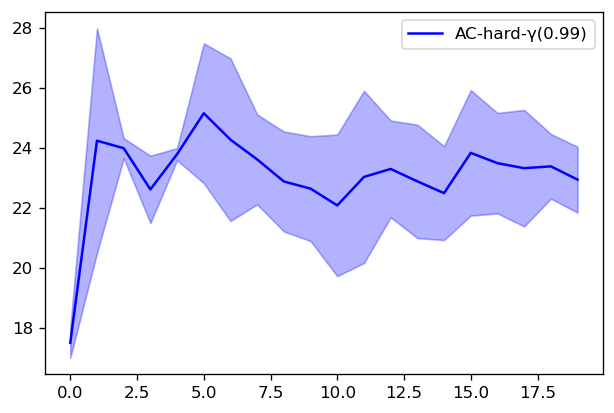

AC-soft-γ(0.99)-λ(1)-CartPole-v0-SEED(12)
Seed=1
Training:


R25(23.95): 100%|███████████████████████████████| 20/20 [00:01<00:00, 10.84it/s]


Training finished!
Seed=2
Training:


R25(21.85): 100%|███████████████████████████████| 20/20 [00:01<00:00, 12.05it/s]


Training finished!


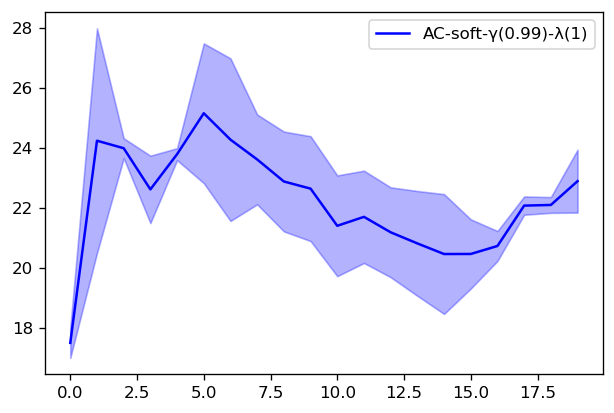

AC-pyro-γ(0.99)-unif-λ(1)-CartPole-v0-SEED(12)
Seed=1
Training:


R25(22.65): 100%|███████████████████████████████| 20/20 [00:02<00:00,  7.42it/s]


Training finished!
Seed=2
Training:


R25(22.3): 100%|████████████████████████████████| 20/20 [00:02<00:00,  8.35it/s]

Training finished!


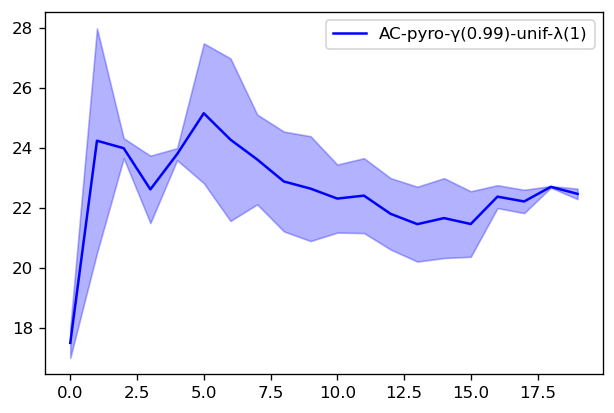

AC-pyro-γ(0.99)-softmaxQ-λ(1)-CartPole-v0-SEED(12)
Seed=1
Training:


R25(21.75): 100%|███████████████████████████████| 20/20 [00:02<00:00,  8.42it/s]


Training finished!
Seed=2
Training:


R25(20.55): 100%|███████████████████████████████| 20/20 [00:02<00:00,  7.72it/s]

Training finished!


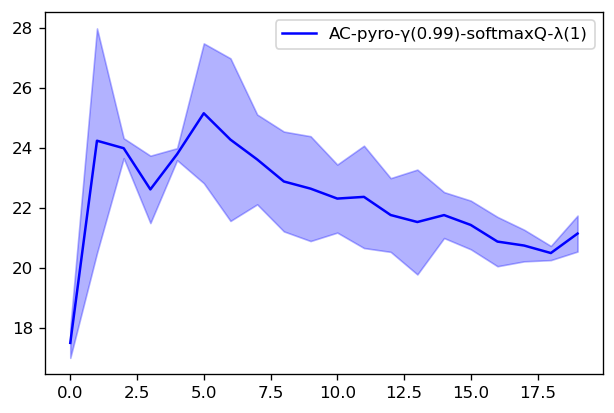

/home/j2655li/projects/rl.pyro
CPU times: user 21.2 s, sys: 711 ms, total: 21.9 s
Wall time: 22.6 s


In [2]:
%%time 

%cd /home/j2655li/projects/rl.pyro

import importlib
import sys

# For illustrative purposes.
name='AC'
spec = importlib.util.find_spec(name)

if name in sys.modules:
    importlib.reload(AC)
    print(f"{name!r} has been reloaded")
elif spec is not None:
    import AC
    print(f"{name!r} has been imported")
else:
    print(f"can't find the {name!r} module")

%mkdir ./SMOKE_TEST
%cd ./SMOKE_TEST

ac = AC.AC("hard", ENV_NAME="CartPole-v0", GAMMA=0.99, SMOKE_TEST=True)
print(ac.t.device)
ac.run()
AC.AC("soft", ENV_NAME="CartPole-v0", GAMMA=0.99, TEMPERATURE=1, SMOKE_TEST=True).run()
AC.AC("pyro", ENV_NAME="CartPole-v0", GAMMA=0.99, TEMPERATURE=1, SMOKE_TEST=True, PRIOR="unif",     SVI_EPOCHS = 1).run()
AC.AC("pyro", ENV_NAME="CartPole-v0", GAMMA=0.99, TEMPERATURE=1, SMOKE_TEST=True, PRIOR="softmaxQ", SVI_EPOCHS = 1).run()

%cd ../
%rm -r ./SMOKE_TEST

### Experiments CartPole-v0

In [3]:
%mkdir /home/j2655li/projects/rl.pyro/experiments/AC-CartPole-v0-GPU
%cd /home/j2655li/projects/rl.pyro/experiments/AC-CartPole-v0-GPU

mkdir: cannot create directory ‘/home/j2655li/projects/rl.pyro/experiments/AC-CartPole-v0-GPU’: File exists
/home/j2655li/projects/rl.pyro/experiments/AC-CartPole-v0-GPU


AC-hard-γ(0.99)-CartPole-v0-SEED(12345)
Seed=1
Training:


R25(197.88): 100%|████████████████████████████████████████████████████| 800/800 [05:55<00:00,  2.25it/s]


Training finished!
Seed=2
Training:


R25(183.4): 100%|█████████████████████████████████████████████████████| 800/800 [05:29<00:00,  2.43it/s]


Training finished!
Seed=3
Training:


R25(177.92): 100%|████████████████████████████████████████████████████| 800/800 [05:27<00:00,  2.44it/s]


Training finished!
Seed=4
Training:


R25(200): 100%|███████████████████████████████████████████████████████| 800/800 [05:43<00:00,  2.33it/s]


Training finished!
Seed=5
Training:


R25(147.24): 100%|████████████████████████████████████████████████████| 800/800 [05:30<00:00,  2.42it/s]


Training finished!


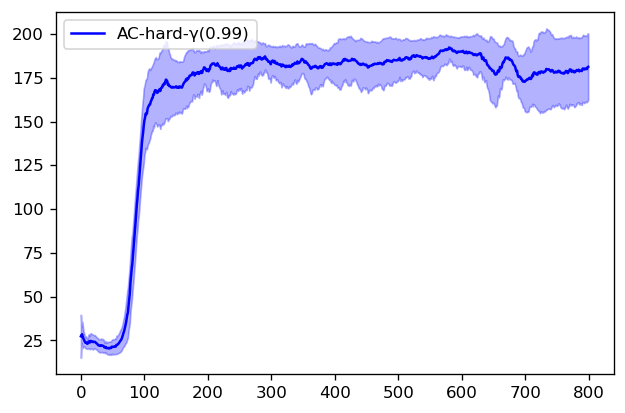

CPU times: user 28min 6s, sys: 5.46 s, total: 28min 12s
Wall time: 28min 7s


In [9]:
%%time
AC.AC(
    "hard",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5]
  ).run()

AC-soft-γ(0.99)-λ(1)-CartPole-v0-SEED(12345)
Seed=1
Training:


R25(199.68): 100%|████████████████████████████████████████████████████| 800/800 [05:24<00:00,  2.47it/s]


Training finished!
Seed=2
Training:


R25(199.28): 100%|████████████████████████████████████████████████████| 800/800 [05:21<00:00,  2.49it/s]


Training finished!
Seed=3
Training:


R25(182.56): 100%|████████████████████████████████████████████████████| 800/800 [05:25<00:00,  2.46it/s]


Training finished!
Seed=4
Training:


R25(195.84): 100%|████████████████████████████████████████████████████| 800/800 [05:20<00:00,  2.49it/s]


Training finished!
Seed=5
Training:


R25(196.56): 100%|████████████████████████████████████████████████████| 800/800 [05:25<00:00,  2.46it/s]


Training finished!


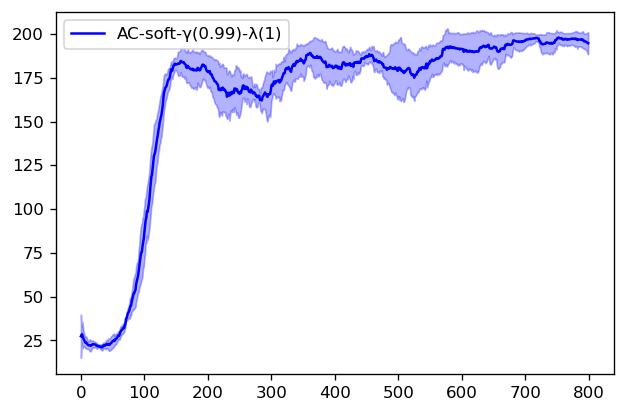

CPU times: user 26min 56s, sys: 5.09 s, total: 27min 1s
Wall time: 26min 57s


In [10]:
%%time
AC.AC(
    "soft",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5]
).run()

AC-pyro-γ(0.99)-unif-λ(1)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(192.36): 100%|████████████████████████████████████████████████████| 800/800 [06:20<00:00,  2.10it/s]


Training finished!
Seed=2
Training:


R25(146.56): 100%|████████████████████████████████████████████████████| 800/800 [06:27<00:00,  2.06it/s]


Training finished!
Seed=3
Training:


R25(188.88): 100%|████████████████████████████████████████████████████| 800/800 [06:25<00:00,  2.08it/s]


Training finished!
Seed=4
Training:


R25(171.24): 100%|████████████████████████████████████████████████████| 800/800 [06:06<00:00,  2.19it/s]


Training finished!
Seed=5
Training:


R25(163.04): 100%|████████████████████████████████████████████████████| 800/800 [06:27<00:00,  2.07it/s]


Training finished!


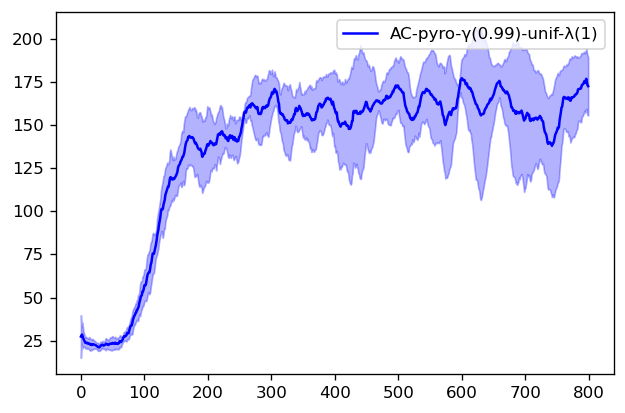

CPU times: user 31min 46s, sys: 5.55 s, total: 31min 52s
Wall time: 31min 47s


In [11]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

AC-pyro-γ(0.99)-softmaxQ-λ(1)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(200): 100%|███████████████████████████████████████████████████████| 800/800 [06:49<00:00,  1.95it/s]


Training finished!
Seed=2
Training:


R25(188.96): 100%|████████████████████████████████████████████████████| 800/800 [06:48<00:00,  1.96it/s]


Training finished!
Seed=3
Training:


R25(197.16): 100%|████████████████████████████████████████████████████| 800/800 [06:51<00:00,  1.94it/s]


Training finished!
Seed=4
Training:


R25(196.64): 100%|████████████████████████████████████████████████████| 800/800 [06:39<00:00,  2.00it/s]


Training finished!
Seed=5
Training:


R25(196.12): 100%|████████████████████████████████████████████████████| 800/800 [06:47<00:00,  1.96it/s]


Training finished!


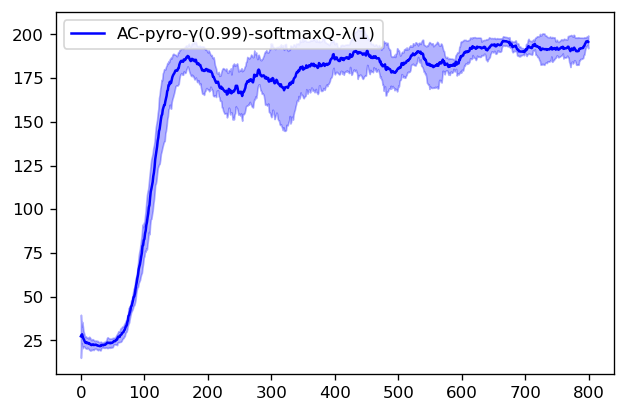

CPU times: user 33min 55s, sys: 5.75 s, total: 34min
Wall time: 33min 56s


In [12]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

AC-pyro-γ(0.99)-unif-λ(1)-CartPole-v0-SVI_EPOCHS(3)-SEED(12345)
Seed=1
Training:


R25(168): 100%|███████████████████████████████████████████████████████| 800/800 [10:38<00:00,  1.25it/s]


Training finished!
Seed=2
Training:


R25(167.32): 100%|████████████████████████████████████████████████████| 800/800 [10:26<00:00,  1.28it/s]


Training finished!
Seed=3
Training:


R25(183.04): 100%|████████████████████████████████████████████████████| 800/800 [10:30<00:00,  1.27it/s]


Training finished!
Seed=4
Training:


R25(167.6): 100%|█████████████████████████████████████████████████████| 800/800 [10:30<00:00,  1.27it/s]


Training finished!
Seed=5
Training:


R25(167.68): 100%|████████████████████████████████████████████████████| 800/800 [10:37<00:00,  1.26it/s]


Training finished!


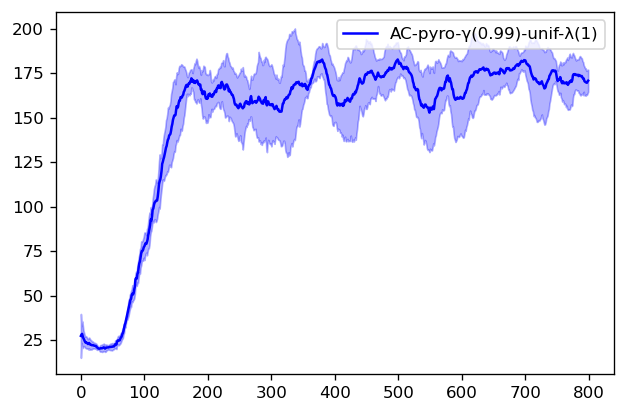

CPU times: user 52min 39s, sys: 9.22 s, total: 52min 49s
Wall time: 52min 42s


In [13]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=3
  ).run(info="SVI_EPOCHS(3)")

AC-pyro-γ(0.99)-softmaxQ-λ(1)-CartPole-v0-SVI_EPOCHS(3)-SEED(12345)
Seed=1
Training:


R25(197.16): 100%|████████████████████████████████████████████████████| 800/800 [10:43<00:00,  1.24it/s]


Training finished!
Seed=2
Training:


R25(200): 100%|███████████████████████████████████████████████████████| 800/800 [12:23<00:00,  1.08it/s]


Training finished!
Seed=3
Training:


R25(177.28): 100%|██████████████████████████████| 800/800 [12:14<00:00,  1.09it/s]


Training finished!
Seed=4
Training:


R25(199.36): 100%|██████████████████████████████| 800/800 [10:44<00:00,  1.24it/s]


Training finished!
Seed=5
Training:


R25(190.6): 100%|███████████████████████████████| 800/800 [11:00<00:00,  1.21it/s]


Training finished!


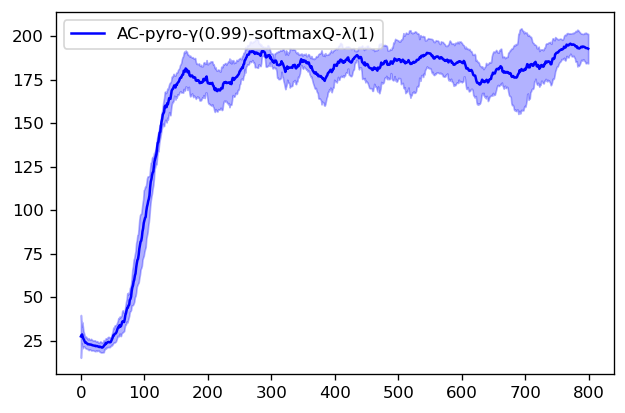

CPU times: user 57min 2s, sys: 10.5 s, total: 57min 12s
Wall time: 57min 7s


In [14]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS =3
  ).run(info="SVI_EPOCHS(3)")

#### AC Soft Temperature

AC-soft-γ(0.99)-λ(0.1)-CartPole-v0-SEED(12345)
Seed=1
Training:


R25(198.84): 100%|██████████████████████████████| 800/800 [05:49<00:00,  2.29it/s]


Training finished!
Seed=2
Training:


R25(200): 100%|█████████████████████████████████| 800/800 [05:27<00:00,  2.44it/s]


Training finished!
Seed=3
Training:


R25(199.52): 100%|██████████████████████████████| 800/800 [05:26<00:00,  2.45it/s]


Training finished!
Seed=4
Training:


R25(200): 100%|█████████████████████████████████| 800/800 [05:36<00:00,  2.38it/s]


Training finished!
Seed=5
Training:


R25(200): 100%|█████████████████████████████████| 800/800 [05:33<00:00,  2.40it/s]


Training finished!


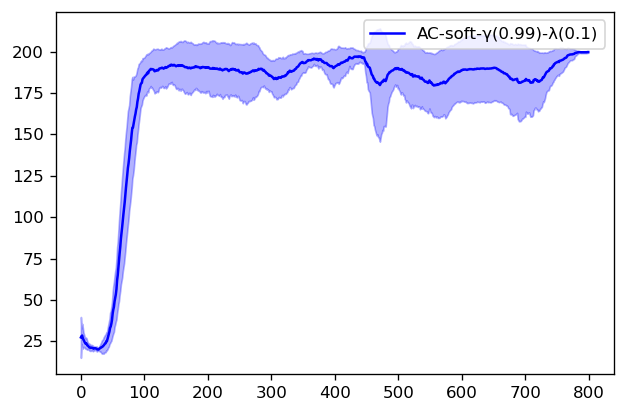

CPU times: user 27min 52s, sys: 5.41 s, total: 27min 57s
Wall time: 27min 53s


In [4]:
%%time
AC.AC(
    "soft",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=0.1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5]
).run()

AC-soft-γ(0.99)-λ(10)-CartPole-v0-SEED(12345)
Seed=1
Training:


R25(191.24): 100%|██████████████████████████████| 800/800 [04:57<00:00,  2.69it/s]


Training finished!
Seed=2
Training:


R25(185.84): 100%|██████████████████████████████| 800/800 [04:58<00:00,  2.68it/s]


Training finished!
Seed=3
Training:


R25(194.48): 100%|██████████████████████████████| 800/800 [05:02<00:00,  2.65it/s]


Training finished!
Seed=4
Training:


R25(182.16): 100%|██████████████████████████████| 800/800 [05:02<00:00,  2.64it/s]


Training finished!
Seed=5
Training:


R25(179.08): 100%|██████████████████████████████| 800/800 [04:59<00:00,  2.67it/s]


Training finished!


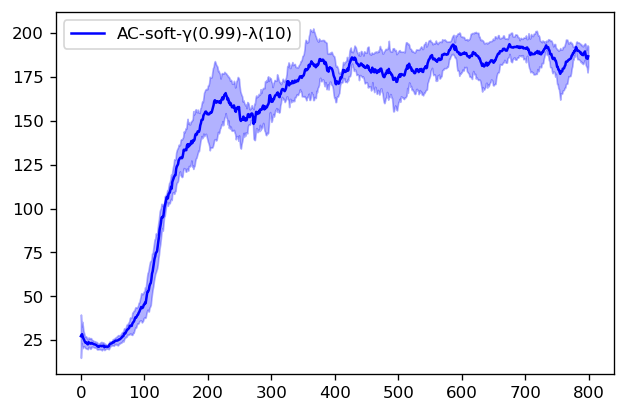

CPU times: user 25min, sys: 5.15 s, total: 25min 5s
Wall time: 25min 1s


In [5]:
%%time
AC.AC(
    "soft",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=10,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5]
).run()

AC-soft-γ(0.99)-λ(100)-CartPole-v0-SEED(12345)
Seed=1
Training:


R25(186.92): 100%|██████████████████████████████| 800/800 [04:56<00:00,  2.70it/s]


Training finished!
Seed=2
Training:


R25(196.8): 100%|███████████████████████████████| 800/800 [04:56<00:00,  2.70it/s]


Training finished!
Seed=3
Training:


R25(183.04): 100%|██████████████████████████████| 800/800 [04:57<00:00,  2.69it/s]


Training finished!
Seed=4
Training:


R25(200): 100%|█████████████████████████████████| 800/800 [04:52<00:00,  2.74it/s]


Training finished!
Seed=5
Training:


R25(195.04): 100%|██████████████████████████████| 800/800 [04:56<00:00,  2.70it/s]


Training finished!


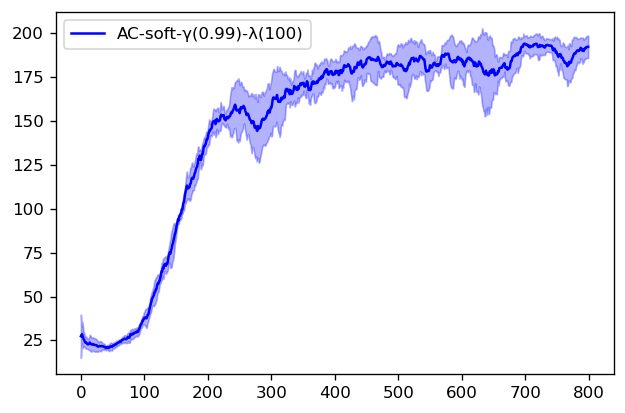

CPU times: user 24min 38s, sys: 5.13 s, total: 24min 43s
Wall time: 24min 39s


In [6]:
%%time
AC.AC(
    "soft",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=100,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5]
).run()

#### AC Pyro Temperature

AC-pyro-γ(0.99)-unif-λ(0.1)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(198.6): 100%|███████████████████████████████| 800/800 [06:04<00:00,  2.20it/s]


Training finished!
Seed=2
Training:


R25(183.16): 100%|██████████████████████████████| 800/800 [05:58<00:00,  2.23it/s]


Training finished!
Seed=3
Training:


R25(175.48): 100%|██████████████████████████████| 800/800 [06:41<00:00,  1.99it/s]


Training finished!
Seed=4
Training:


R25(66.76): 100%|███████████████████████████████| 800/800 [05:52<00:00,  2.27it/s]


Training finished!
Seed=5
Training:


R25(91.24): 100%|███████████████████████████████| 800/800 [06:05<00:00,  2.19it/s]


Training finished!


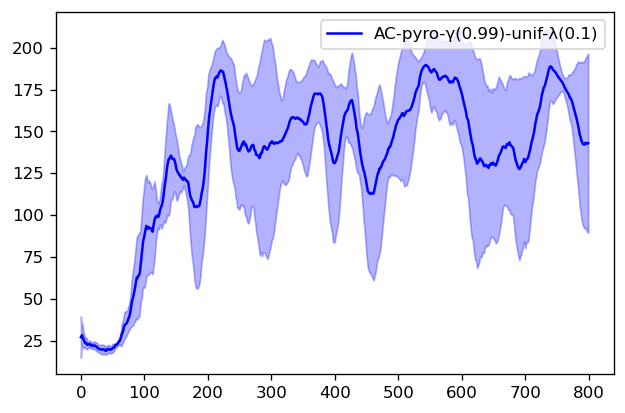

CPU times: user 30min 40s, sys: 5.39 s, total: 30min 45s
Wall time: 30min 41s


In [7]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=0.1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

AC-pyro-γ(0.99)-softmaxQ-λ(0.1)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(198.04): 100%|██████████████████████████████| 800/800 [06:47<00:00,  1.96it/s]


Training finished!
Seed=2
Training:


R25(189.04): 100%|██████████████████████████████| 800/800 [07:01<00:00,  1.90it/s]


Training finished!
Seed=3
Training:


R25(182.4): 100%|███████████████████████████████| 800/800 [06:55<00:00,  1.93it/s]


Training finished!
Seed=4
Training:


R25(194.92): 100%|██████████████████████████████| 800/800 [06:45<00:00,  1.97it/s]


Training finished!
Seed=5
Training:


R25(180.64): 100%|██████████████████████████████| 800/800 [06:52<00:00,  1.94it/s]


Training finished!


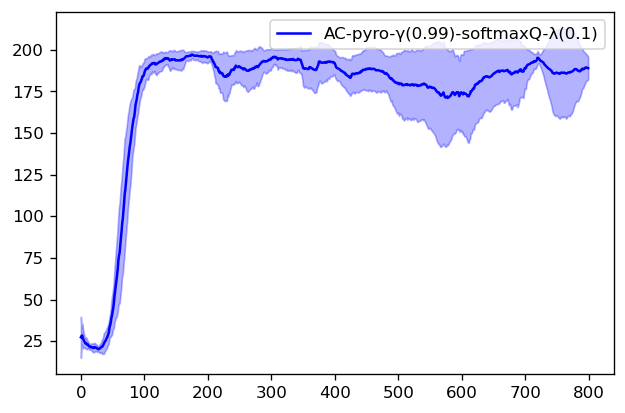

CPU times: user 34min 21s, sys: 5.31 s, total: 34min 26s
Wall time: 34min 22s


In [13]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=0.1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

AC-pyro-γ(0.99)-unif-λ(10)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(160.32): 100%|██████████████████████████████| 800/800 [05:59<00:00,  2.23it/s]


Training finished!
Seed=2
Training:


R25(192.8): 100%|███████████████████████████████| 800/800 [06:06<00:00,  2.18it/s]


Training finished!
Seed=3
Training:


R25(147.52): 100%|██████████████████████████████| 800/800 [06:02<00:00,  2.21it/s]


Training finished!
Seed=4
Training:


R25(125.08): 100%|██████████████████████████████| 800/800 [06:03<00:00,  2.20it/s]


Training finished!
Seed=5
Training:


R25(174.36): 100%|██████████████████████████████| 800/800 [06:08<00:00,  2.17it/s]


Training finished!


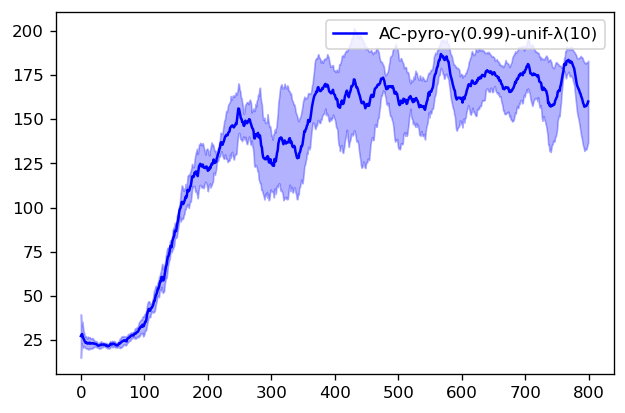

CPU times: user 30min 19s, sys: 5.17 s, total: 30min 24s
Wall time: 30min 19s


In [14]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=10,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

AC-pyro-γ(0.99)-softmaxQ-λ(10)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(183.6): 100%|███████████████████████████████| 800/800 [06:23<00:00,  2.09it/s]


Training finished!
Seed=2
Training:


R25(190.8): 100%|███████████████████████████████| 800/800 [06:20<00:00,  2.10it/s]


Training finished!
Seed=3
Training:


R25(189.6): 100%|███████████████████████████████| 800/800 [06:23<00:00,  2.09it/s]


Training finished!
Seed=4
Training:


R25(183.24): 100%|██████████████████████████████| 800/800 [06:23<00:00,  2.09it/s]


Training finished!
Seed=5
Training:


R25(162.24): 100%|██████████████████████████████| 800/800 [06:18<00:00,  2.12it/s]


Training finished!


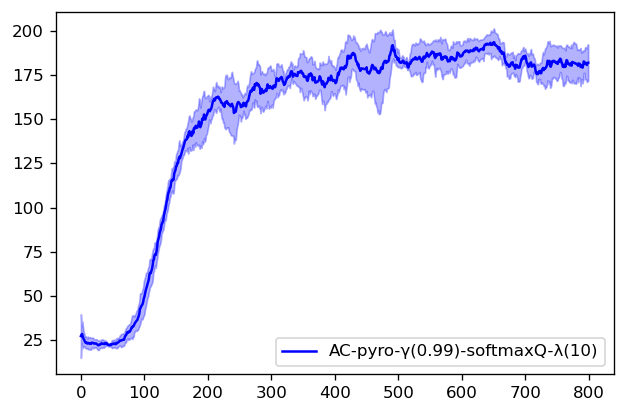

CPU times: user 31min 48s, sys: 5.38 s, total: 31min 53s
Wall time: 31min 48s


In [15]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=10,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

AC-pyro-γ(0.99)-unif-λ(100)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(155): 100%|█████████████████████████████████| 800/800 [05:55<00:00,  2.25it/s]


Training finished!
Seed=2
Training:


R25(197.64): 100%|██████████████████████████████| 800/800 [06:02<00:00,  2.21it/s]


Training finished!
Seed=3
Training:


R25(192.92): 100%|██████████████████████████████| 800/800 [06:05<00:00,  2.19it/s]


Training finished!
Seed=4
Training:


R25(198.48): 100%|██████████████████████████████| 800/800 [06:04<00:00,  2.19it/s]


Training finished!
Seed=5
Training:


R25(184.96): 100%|██████████████████████████████| 800/800 [05:59<00:00,  2.22it/s]


Training finished!


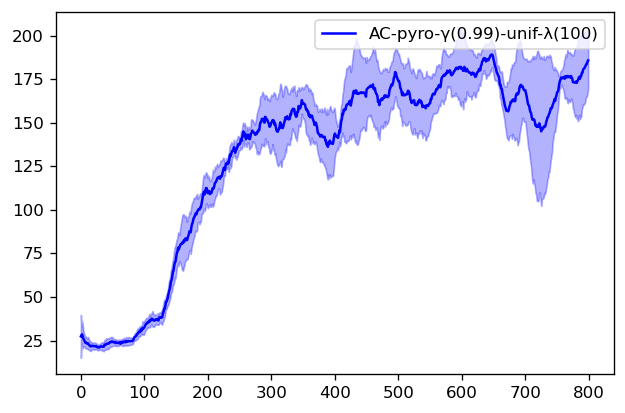

CPU times: user 30min 7s, sys: 5.22 s, total: 30min 12s
Wall time: 30min 8s


In [16]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=100,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

AC-pyro-γ(0.99)-softmaxQ-λ(100)-CartPole-v0-SVI_EPOCHS(1)-SEED(12345)
Seed=1
Training:


R25(178.68): 100%|██████████████████████████████| 800/800 [06:20<00:00,  2.10it/s]


Training finished!
Seed=2
Training:


R25(189.64): 100%|██████████████████████████████| 800/800 [06:21<00:00,  2.10it/s]


Training finished!
Seed=3
Training:


R25(191.08): 100%|██████████████████████████████| 800/800 [06:22<00:00,  2.09it/s]


Training finished!
Seed=4
Training:


R25(187.6): 100%|███████████████████████████████| 800/800 [06:15<00:00,  2.13it/s]


Training finished!
Seed=5
Training:


R25(183.92): 100%|██████████████████████████████| 800/800 [06:16<00:00,  2.12it/s]


Training finished!


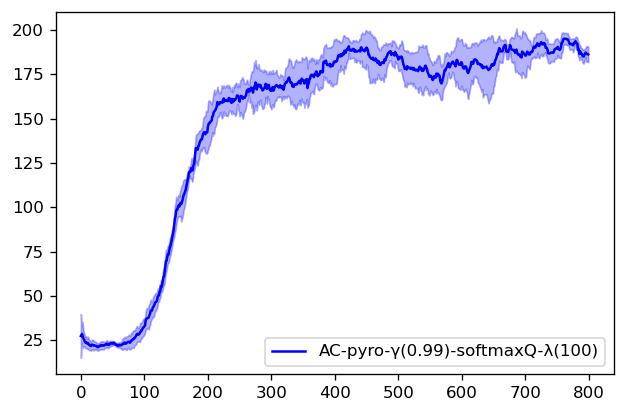

CPU times: user 31min 36s, sys: 5.42 s, total: 31min 41s
Wall time: 31min 37s


In [18]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v0",
    GAMMA=0.99,
    TEMPERATURE=100,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=800,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)")

### Experiments (CartPole-v1)

In [4]:
%mkdir /home/j2655li/projects/rl.pyro/experiments/AC-CartPole-v1-GPU
%cd /home/j2655li/projects/rl.pyro/experiments/AC-CartPole-v1-GPU

/home/j2655li/projects/rl.pyro/experiments/AC-CartPole-v1-GPU


AC-hard-γ(0.99)-CartPole-v1-SEED(12345)
Seed=1
Training:


R25(94.6): 100%|██████████████████████████████| 1600/1600 [15:49<00:00,  1.69it/s]


Training finished!
Seed=2
Training:


R25(148.04): 100%|████████████████████████████| 1600/1600 [15:29<00:00,  1.72it/s]


Training finished!
Seed=3
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [15:49<00:00,  1.68it/s]


Training finished!
Seed=4
Training:


R25(403.28): 100%|████████████████████████████| 1600/1600 [18:07<00:00,  1.47it/s]


Training finished!
Seed=5
Training:


R25(322.08): 100%|████████████████████████████| 1600/1600 [15:51<00:00,  1.68it/s]


Training finished!


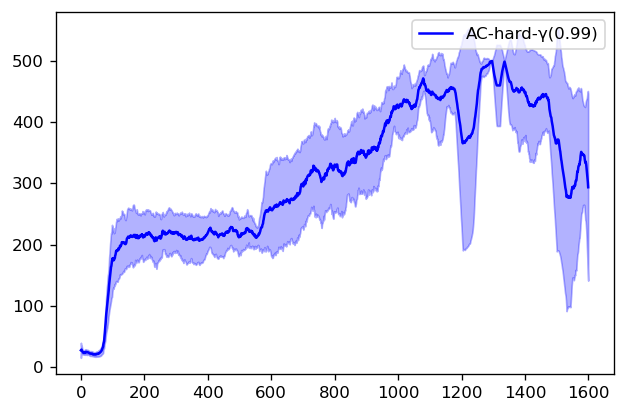

CPU times: user 1h 21min 6s, sys: 10.5 s, total: 1h 21min 16s
Wall time: 1h 21min 7s


In [20]:
%%time
AC.AC(
    "hard",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5]
  ).run()

AC-soft-γ(0.99)-λ(1)-CartPole-v1-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [16:44<00:00,  1.59it/s]


Training finished!
Seed=2
Training:


R25(442.72): 100%|████████████████████████████| 1600/1600 [17:43<00:00,  1.51it/s]


Training finished!
Seed=3
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [17:23<00:00,  1.53it/s]


Training finished!
Seed=4
Training:


R25(448.8): 100%|█████████████████████████████| 1600/1600 [17:21<00:00,  1.54it/s]


Training finished!
Seed=5
Training:


R25(493.76): 100%|████████████████████████████| 1600/1600 [16:58<00:00,  1.57it/s]


Training finished!


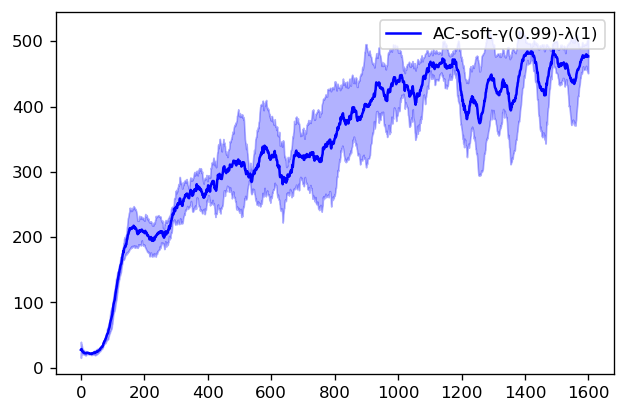

CPU times: user 1h 26min 10s, sys: 10.8 s, total: 1h 26min 21s
Wall time: 1h 26min 11s


In [21]:
%%time
AC.AC(
    "soft",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5]
).run("EPISODES(1600)")

AC-pyro-γ(0.99)-unif-λ(1)-CartPole-v1-SVI_EPOCHS(1)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(390.96): 100%|████████████████████████████| 1600/1600 [16:40<00:00,  1.60it/s]


Training finished!
Seed=2
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [17:57<00:00,  1.48it/s]


Training finished!
Seed=3
Training:


R25(276.68): 100%|████████████████████████████| 1600/1600 [16:12<00:00,  1.65it/s]


Training finished!
Seed=4
Training:


R25(273.92): 100%|████████████████████████████| 1600/1600 [17:17<00:00,  1.54it/s]


Training finished!
Seed=5
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [17:41<00:00,  1.51it/s]


Training finished!


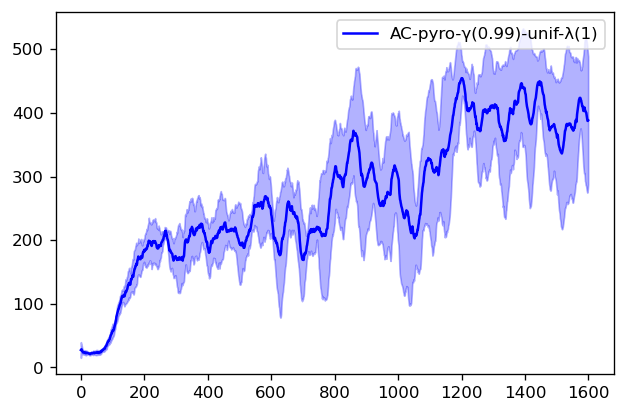

CPU times: user 1h 25min 49s, sys: 10.3 s, total: 1h 25min 59s
Wall time: 1h 25min 50s


In [22]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)-EPISODES(1600)")

AC-pyro-γ(0.99)-softmaxQ-λ(1)-CartPole-v1-SVI_EPOCHS(1)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(486.32): 100%|████████████████████████████| 1600/1600 [20:37<00:00,  1.29it/s]


Training finished!
Seed=2
Training:


R25(445.96): 100%|████████████████████████████| 1600/1600 [20:44<00:00,  1.29it/s]


Training finished!
Seed=3
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [19:30<00:00,  1.37it/s]


Training finished!
Seed=4
Training:


R25(313.48): 100%|████████████████████████████| 1600/1600 [18:55<00:00,  1.41it/s]


Training finished!
Seed=5
Training:


R25(432.28): 100%|████████████████████████████| 1600/1600 [19:52<00:00,  1.34it/s]


Training finished!


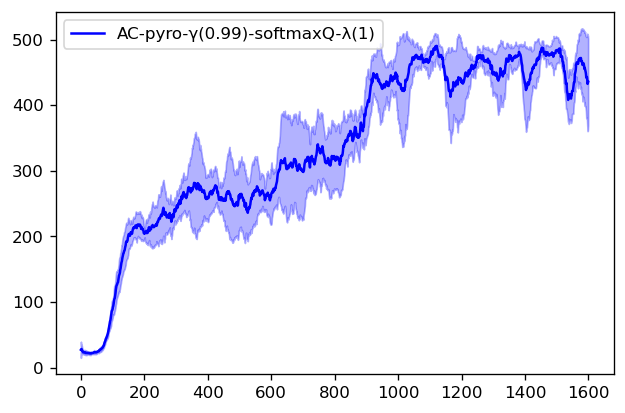

CPU times: user 1h 39min 40s, sys: 10.9 s, total: 1h 39min 51s
Wall time: 1h 39min 41s


In [23]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)-EPISODES(1600)")

AC-pyro-γ(0.99)-unif-λ(1)-CartPole-v1-SVI_EPOCHS(3)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(406.08): 100%|████████████████████████████| 1600/1600 [25:03<00:00,  1.06it/s]


Training finished!
Seed=2
Training:


R25(343.56): 100%|████████████████████████████| 1600/1600 [25:26<00:00,  1.05it/s]


Training finished!
Seed=3
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [26:21<00:00,  1.01it/s]


Training finished!
Seed=4
Training:


R25(324.84): 100%|████████████████████████████| 1600/1600 [24:27<00:00,  1.09it/s]


Training finished!
Seed=5
Training:


R25(421.2): 100%|█████████████████████████████| 1600/1600 [23:43<00:00,  1.12it/s]


Training finished!


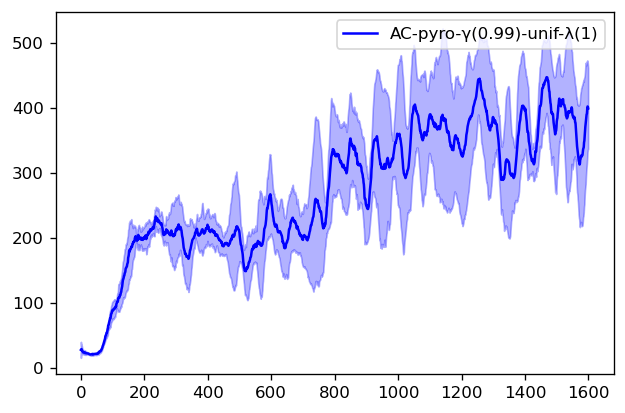

CPU times: user 2h 4min 58s, sys: 18.9 s, total: 2h 5min 17s
Wall time: 2h 5min 4s


In [24]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=3
  ).run(info="SVI_EPOCHS(3)-EPISODES(1600)")

AC-pyro-γ(0.99)-softmaxQ-λ(1)-CartPole-v1-SVI_EPOCHS(3)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(465): 100%|███████████████████████████████| 1600/1600 [27:06<00:00,  1.02s/it]


Training finished!
Seed=2
Training:


R25(480.72): 100%|████████████████████████████| 1600/1600 [27:09<00:00,  1.02s/it]


Training finished!
Seed=3
Training:


R25(492.96): 100%|████████████████████████████| 1600/1600 [27:37<00:00,  1.04s/it]


Training finished!
Seed=4
Training:


R25(485.16): 100%|████████████████████████████| 1600/1600 [27:43<00:00,  1.04s/it]


Training finished!
Seed=5
Training:


R25(451.28): 100%|████████████████████████████| 1600/1600 [26:29<00:00,  1.01it/s]


Training finished!


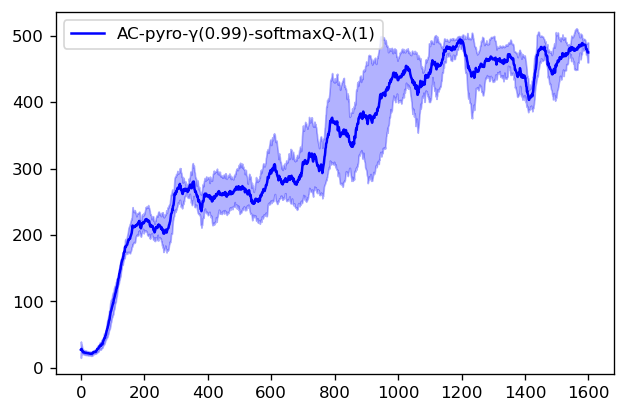

CPU times: user 2h 16min 3s, sys: 18.6 s, total: 2h 16min 21s
Wall time: 2h 16min 8s


In [25]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=3
  ).run(info="SVI_EPOCHS(3)-EPISODES(1600)")

####  Temperature

AC-pyro-γ(0.99)-softmaxQ-λ(0.1)-CartPole-v1-SVI_EPOCHS(1)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(340.12): 100%|██████████████████████████| 1600/1600 [23:25<00:00,  1.14it/s]


Training finished!
Seed=2
Training:


R25(444.6): 100%|█████████████████████████████| 1600/1600 [30:14<00:00,  1.13s/it]


Training finished!
Seed=3
Training:


R25(324.2): 100%|██████████████████████████| 1600/1600 [31:03<00:00,  1.16s/it]


Training finished!
Seed=4
Training:


R25(297.84): 100%|█████████████████████████| 1600/1600 [31:12<00:00,  1.17s/it]


Training finished!
Seed=5
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [29:21<00:00,  1.10s/it]


Training finished!


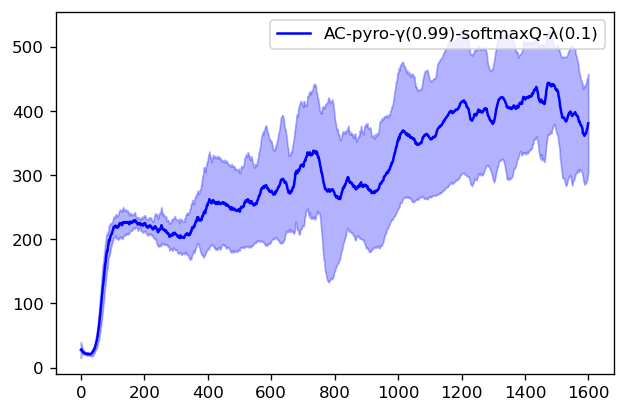

CPU times: user 2h 24min 57s, sys: 18.3 s, total: 2h 25min 15s
Wall time: 2h 25min 17s


In [5]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=0.1,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)-EPISODES(1600)")

AC-pyro-γ(0.99)-softmaxQ-λ(0.5)-CartPole-v1-SVI_EPOCHS(3)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(498.92): 100%|████████████████████████████| 1600/1600 [43:53<00:00,  1.65s/it]


Training finished!
Seed=2
Training:


R25(459.32): 100%|████████████████████████████| 1600/1600 [44:15<00:00,  1.66s/it]


Training finished!
Seed=3
Training:


R25(492.64): 100%|████████████████████████████| 1600/1600 [44:40<00:00,  1.68s/it]


Training finished!
Seed=4
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [43:35<00:00,  1.63s/it]


Training finished!
Seed=5
Training:


R25(482): 100%|███████████████████████████████| 1600/1600 [41:58<00:00,  1.57s/it]


Training finished!


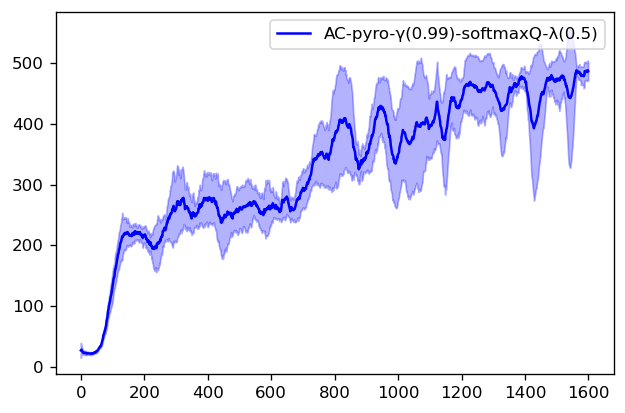

CPU times: user 3h 38min 14s, sys: 31.6 s, total: 3h 38min 45s
Wall time: 3h 38min 24s


In [6]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=0.5,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=3
  ).run(info="SVI_EPOCHS(3)-EPISODES(1600)")

AC-pyro-γ(0.99)-softmaxQ-λ(1.5)-CartPole-v1-SVI_EPOCHS(3)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(500): 100%|███████████████████████████████| 1600/1600 [42:29<00:00,  1.59s/it]


Training finished!
Seed=2
Training:


R25(472.2): 100%|█████████████████████████████| 1600/1600 [43:20<00:00,  1.63s/it]


Training finished!
Seed=3
Training:


R25(488.52): 100%|████████████████████████████| 1600/1600 [44:02<00:00,  1.65s/it]


Training finished!
Seed=4
Training:


R25(428.6): 100%|█████████████████████████████| 1600/1600 [43:59<00:00,  1.65s/it]


Training finished!
Seed=5
Training:


R25(493.92): 100%|████████████████████████████| 1600/1600 [43:49<00:00,  1.64s/it]


Training finished!


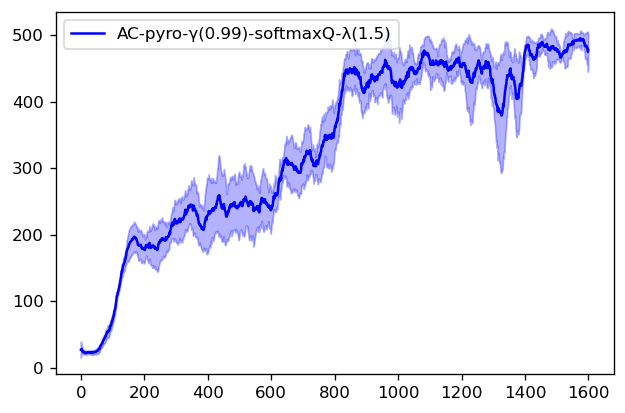

CPU times: user 3h 37min 33s, sys: 31.6 s, total: 3h 38min 4s
Wall time: 3h 37min 42s


In [7]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=1.5,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=3
  ).run(info="SVI_EPOCHS(3)-EPISODES(1600)")

AC-pyro-γ(0.99)-softmaxQ-λ(5)-CartPole-v1-SVI_EPOCHS(3)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(484.96): 100%|████████████████████████████| 1600/1600 [43:37<00:00,  1.64s/it]


Training finished!
Seed=2
Training:


R25(470.12): 100%|████████████████████████████| 1600/1600 [43:31<00:00,  1.63s/it]


Training finished!
Seed=3
Training:


R25(476.04): 100%|████████████████████████████| 1600/1600 [42:42<00:00,  1.60s/it]


Training finished!
Seed=4
Training:


R25(395.04): 100%|████████████████████████████| 1600/1600 [42:19<00:00,  1.59s/it]


Training finished!
Seed=5
Training:


R25(441.56): 100%|████████████████████████████| 1600/1600 [43:36<00:00,  1.64s/it]


Training finished!


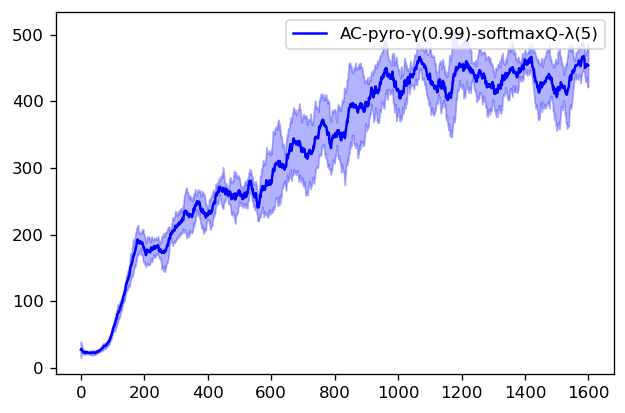

CPU times: user 3h 35min 38s, sys: 30.9 s, total: 3h 36min 9s
Wall time: 3h 35min 47s


In [8]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=5,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="softmaxQ",
    SVI_EPOCHS=3
  ).run(info="SVI_EPOCHS(3)-EPISODES(1600)")

AC-pyro-γ(0.99)-unif-λ(2)-CartPole-v1-SVI_EPOCHS(1)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(312.04): 100%|████████████████████████████| 1600/1600 [26:35<00:00,  1.00it/s]


Training finished!
Seed=2
Training:


R25(293.16): 100%|████████████████████████████| 1600/1600 [25:56<00:00,  1.03it/s]


Training finished!
Seed=3
Training:


R25(234.96): 100%|████████████████████████████| 1600/1600 [27:14<00:00,  1.02s/it]


Training finished!
Seed=4
Training:


R25(236.68): 100%|████████████████████████████| 1600/1600 [26:21<00:00,  1.01it/s]


Training finished!
Seed=5
Training:


R25(234.96): 100%|████████████████████████████| 1600/1600 [26:33<00:00,  1.00it/s]


Training finished!


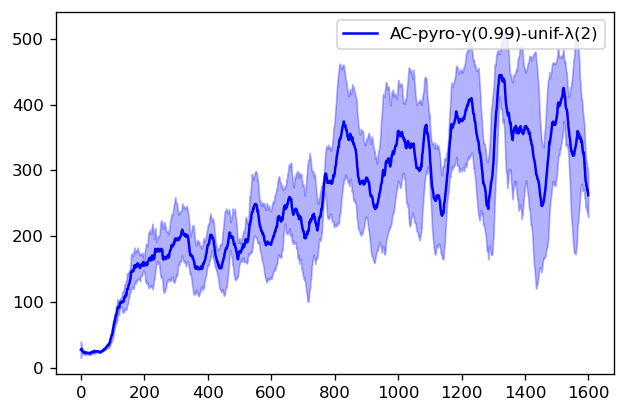

CPU times: user 2h 12min 38s, sys: 19 s, total: 2h 12min 57s
Wall time: 2h 12min 42s


In [9]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=2,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)-EPISODES(1600)")

AC-pyro-γ(0.99)-unif-λ(10)-CartPole-v1-SVI_EPOCHS(1)-EPISODES(1600)-SEED(12345)
Seed=1
Training:


R25(230.96): 100%|████████████████████████████| 1600/1600 [27:03<00:00,  1.01s/it]


Training finished!
Seed=2
Training:


R25(349.04): 100%|████████████████████████████| 1600/1600 [28:46<00:00,  1.08s/it]


Training finished!
Seed=3
Training:


R25(483.52): 100%|████████████████████████████| 1600/1600 [26:33<00:00,  1.00it/s]


Training finished!
Seed=4
Training:


R25(325.92): 100%|████████████████████████████| 1600/1600 [24:38<00:00,  1.08it/s]


Training finished!
Seed=5
Training:


R25(437.56): 100%|████████████████████████████| 1600/1600 [25:04<00:00,  1.06it/s]


Training finished!


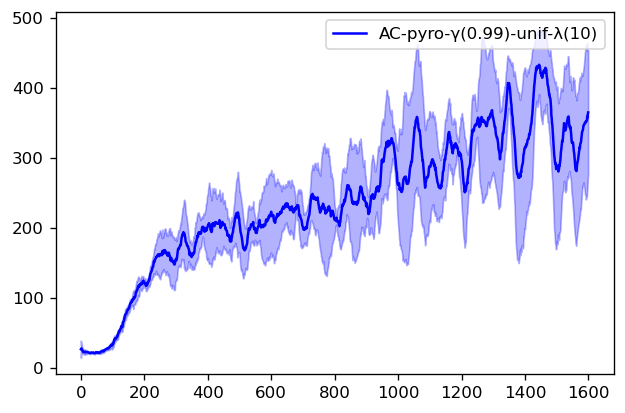

CPU times: user 2h 11min 56s, sys: 20.5 s, total: 2h 12min 16s
Wall time: 2h 12min 6s


In [10]:
%%time
AC.AC(
    "pyro",
    ENV_NAME="CartPole-v1",
    GAMMA=0.99,
    TEMPERATURE=10,
    TARGET_UPDATE_TAU=0.005,
    EPISODES=1600,
    SEEDS=[1,2,3,4,5],
    PRIOR="unif",
    SVI_EPOCHS=1
).run(info="SVI_EPOCHS(1)-EPISODES(1600)")